In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
data_df = pd.read_csv('/Users/tinglu/Desktop/stack-overflow-survey/final_data.csv')
data_df.head()

,Age,EdLevel,YearsCodePro,DevType,CompanySize,Salary_USD
0,18-35 years old,Master,2,DS/MLE,Small(1-99),42480.0
1,18-35 years old,Bachelor,5,DS/MLE,Large(>1000),130000.0
2,18-35 years old,Master,2,DE/DA/BA,Large(>1000),28320.0
3,>35 years old,Doctoral(PhD),8,DS/MLE,Medium(100-999),158000.0
4,18-35 years old,Doctoral(PhD),1,DS/MLE,Small(1-99),100000.0


In [43]:
data_df['EdLevel'].value_counts()

Master           3291
Bachelor         3204
Doctoral(PhD)     777
Name: EdLevel, dtype: int64

In [44]:
data_df['DevType'].value_counts()

DE/DA/BA    3931
DS/MLE      3341
Name: DevType, dtype: int64

### Relationship between Salary and Years of professional coding by Education Level and Job Type

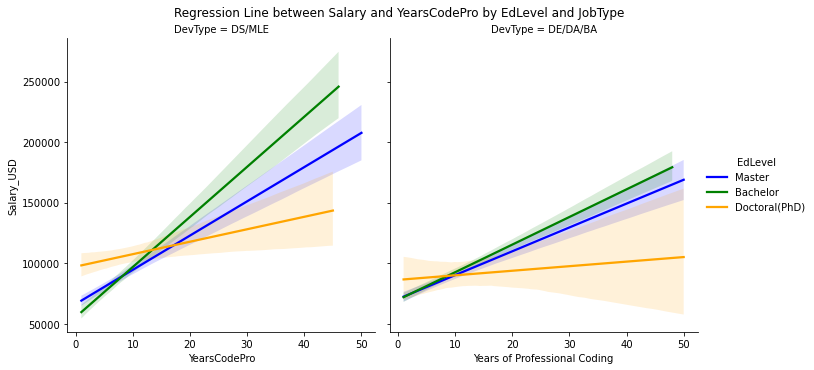

In [47]:
data_df['YearsCodePro'] = pd.to_numeric(data_df['YearsCodePro'], errors='coerce')

custom_palette = {
    'Master': 'blue',
    'Doctoral(PhD)': 'orange',
    'Bachelor': 'green',
}

g = sns.lmplot(data=data_df, x='YearsCodePro', y='Salary_USD', hue='EdLevel', col='DevType', col_wrap=2,
               palette=custom_palette, scatter_kws={'alpha': 0.3}, scatter=False) 

plt.xlabel('Years of Professional Coding')
plt.ylabel('Salary')
plt.suptitle('Regression Line between Salary and YearsCodePro by EdLevel and JobType', y=1.02)
plt.show()


### Relationship between Salary and Years of professional coding by Education Level and CompanySize

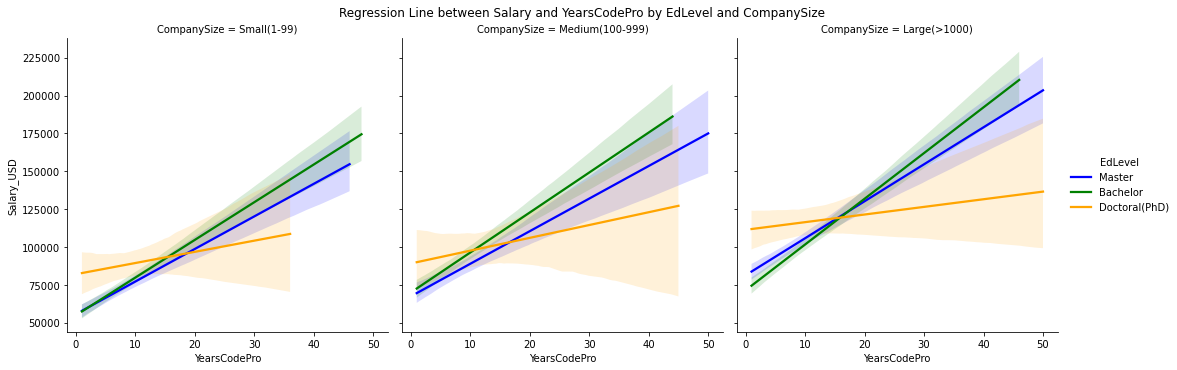

In [46]:
sns.lmplot(data=data_df, x='YearsCodePro', y='Salary_USD',hue ='EdLevel', col='CompanySize',
               palette=custom_palette, scatter_kws={'alpha': 0.1},scatter=False, 
           col_order=['Small(1-99)', 'Medium(100-999)', 'Large(>1000)'])

plt.ylabel('Salary')
plt.suptitle('Regression Line between Salary and YearsCodePro by EdLevel and CompanySize', y=1.02)
plt.show()